In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [70]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [71]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [72]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [73]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [74]:
dummy_var = ['anaemia', 'diabetes', 'sex', 'high_blood_pressure', 'smoking']

In [75]:
df = pd.get_dummies(df, columns=dummy_var, drop_first=True)

In [76]:
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,sex_1,high_blood_pressure_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,1,0,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,1,0,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,0,0,1,1,1,1
295,55.0,1820,38,270000.00,1.2,139,271,0,0,0,0,0,0
296,45.0,2060,60,742000.00,0.8,138,278,0,0,1,0,0,0
297,45.0,2413,38,140000.00,1.4,140,280,0,0,0,1,0,1


In [77]:
X=df.drop(['DEATH_EVENT'], axis=1).values
y=df['DEATH_EVENT'].values

In [78]:
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,sex_1,high_blood_pressure_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,1,0,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,1,0,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,1,0,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,0,0,1,1,1,1
295,55.0,1820,38,270000.00,1.2,139,271,0,0,0,0,0,0
296,45.0,2060,60,742000.00,0.8,138,278,0,0,1,0,0,0
297,45.0,2413,38,140000.00,1.4,140,280,0,0,0,1,0,1


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [81]:
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

In [82]:
logit = LogisticRegression()
logit.fit(X_train_tr, y_train)

LogisticRegression()

In [83]:
y_pred = logit.predict(X_test_tr)

In [84]:
accuracy_score(y_pred, y_test)

0.7866666666666666

In [85]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


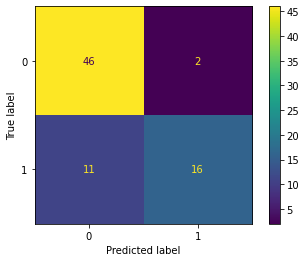

In [67]:
plot_confusion_matrix(logit, X_test_tr, y_test)